In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [27]:
train = pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')
test = pd.read_csv('blood_samples_dataset_test.csv')

In [28]:
print(train.shape)
print(test.shape)

(2351, 25)
(486, 25)


In [29]:
train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


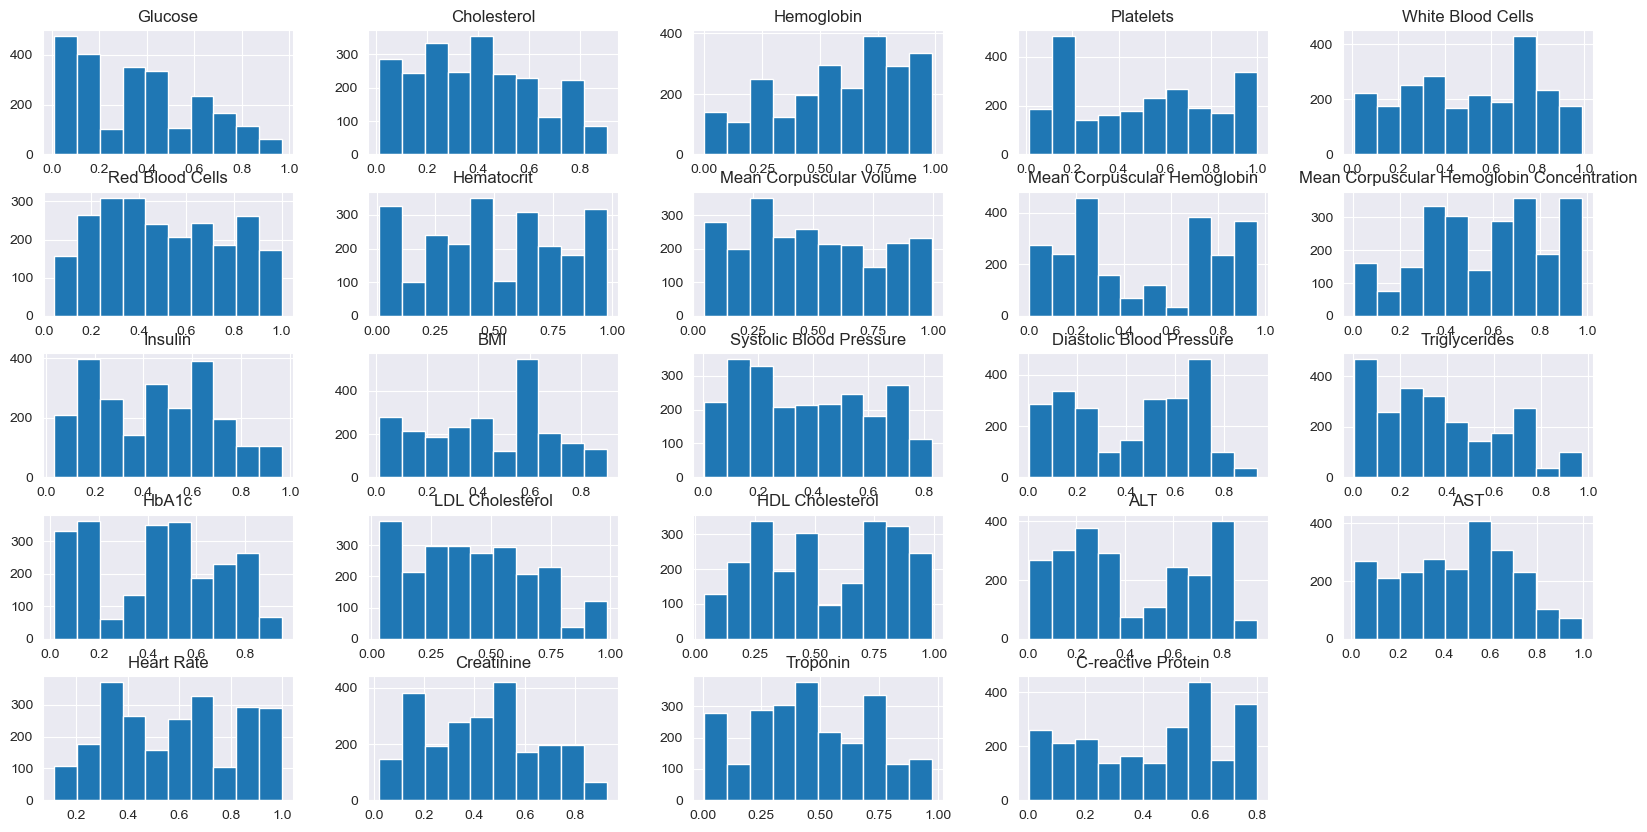

In [30]:
train.hist(figsize=(20, 10))
plt.show()

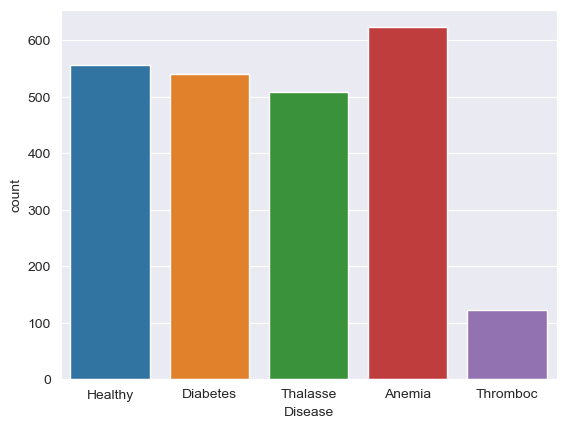

In [31]:
sns.countplot(data= train, x= 'Disease')
plt.show()

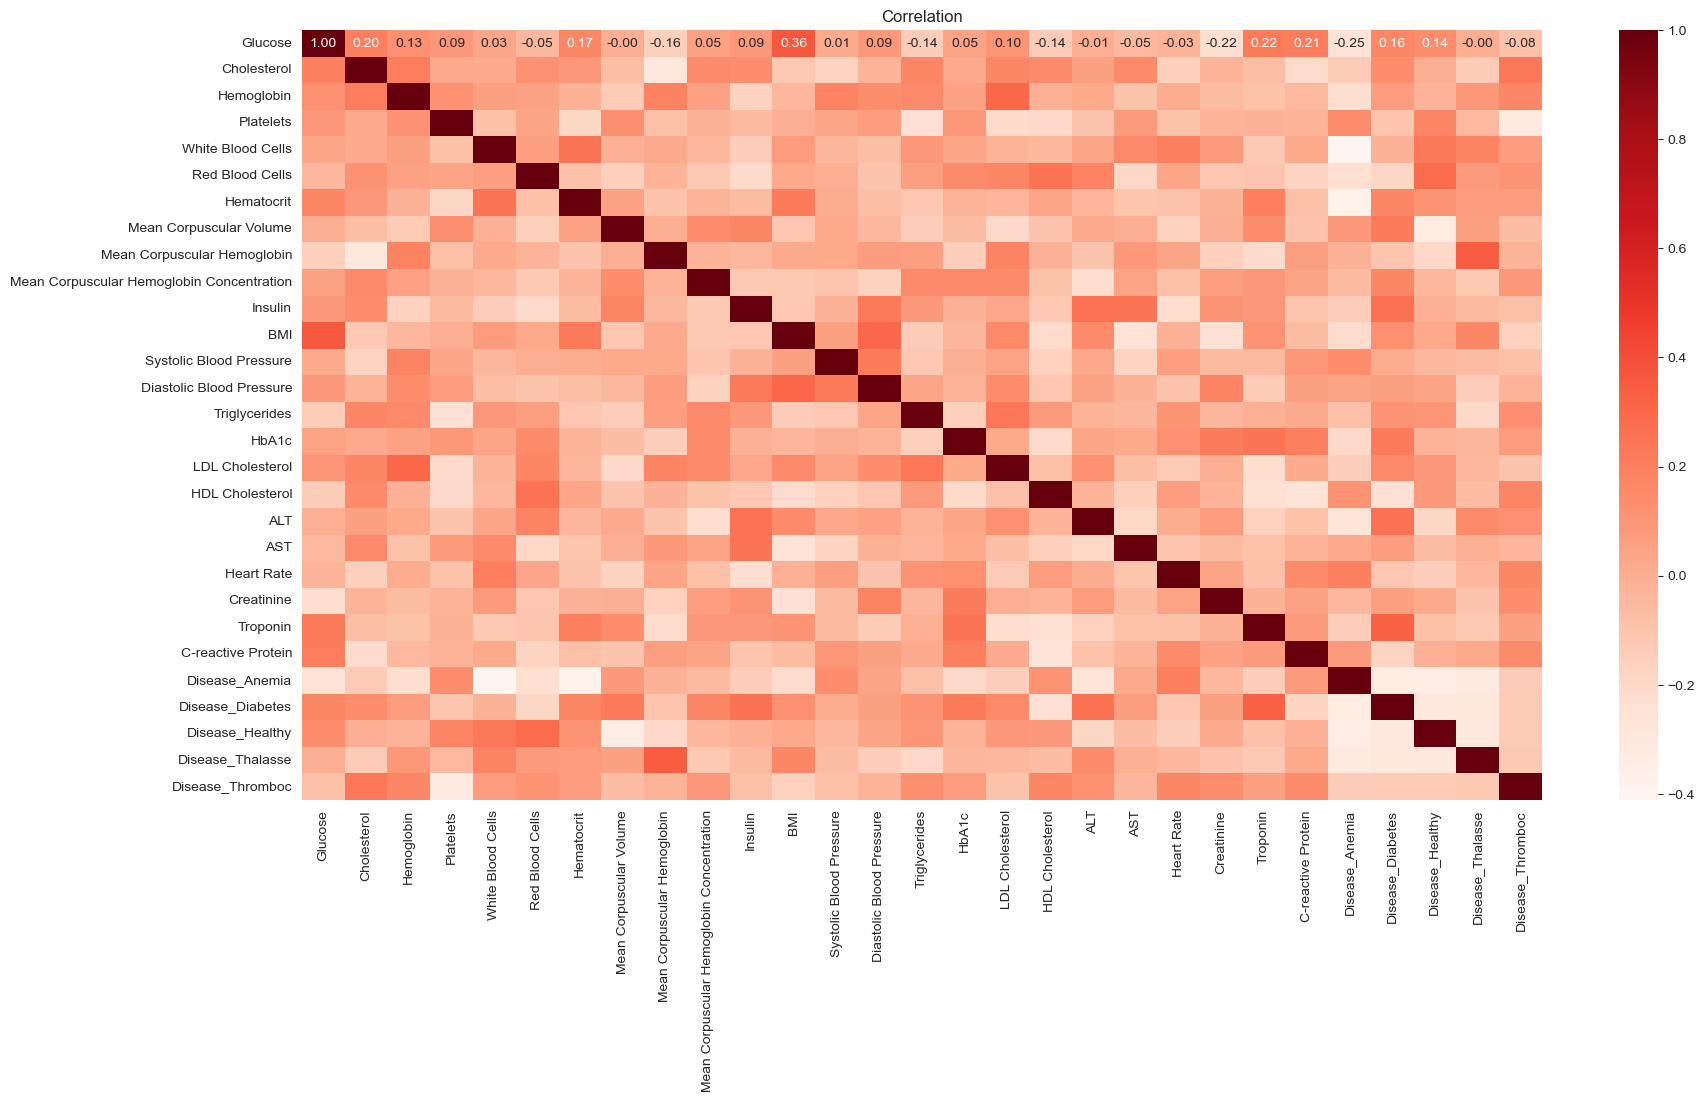

In [32]:
encoded = pd.get_dummies(train)
cor = encoded.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True, cmap = 'Reds', fmt=".2f")
plt.title('Correlation')
plt.show()

支持向量机
=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [33]:
df = pd.concat([train,test],ignore_index=True)
X = df.drop(columns=['Disease'])
y = df['Disease']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def calculate_acc(confusion_matrix):
    correct =  np.trace(confusion_matrix)
    total = np.sum(confusion_matrix)
    return correct / total

In [48]:
def svm(kernel):
    SVM = SVC(kernel=kernel)
    SVM.fit(X_train, y_train)
    return SVM.predict(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

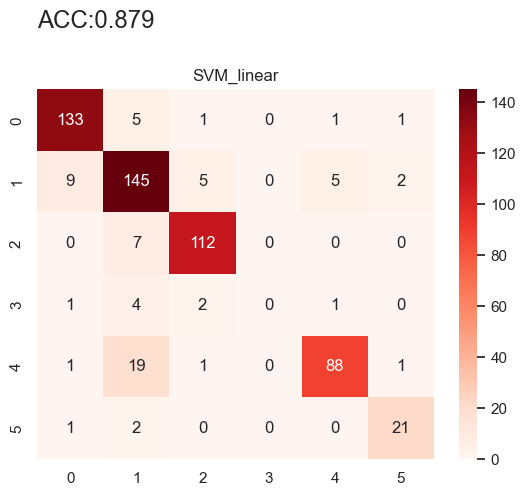

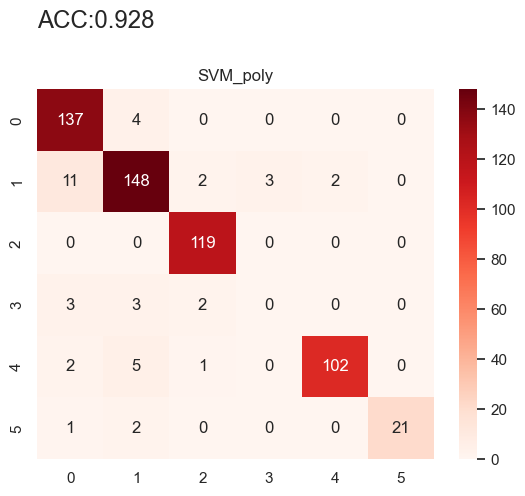

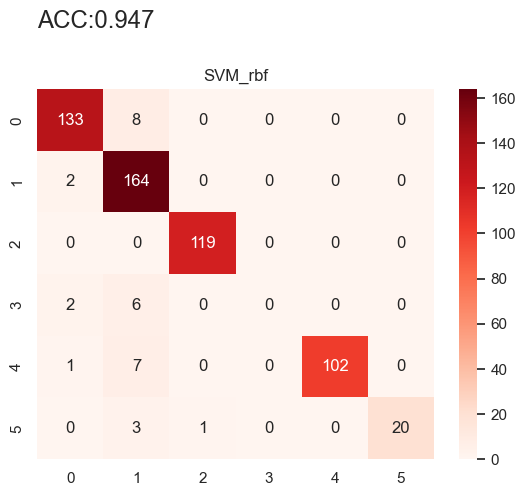

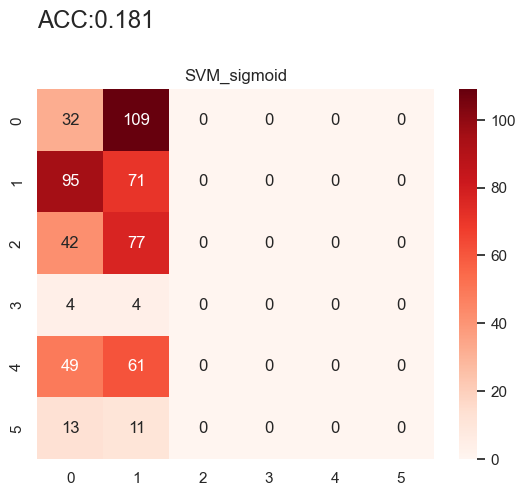

In [49]:
for index, i in enumerate(kernels):
    cm = confusion_matrix(y_test, svm(i))
    sns.heatmap(cm, annot=True, cmap = 'Reds', fmt="d")
    plt.title('SVM_'+ i)
    plt.annotate("ACC:%.3f"%(calculate_acc(cm)), (0, -1), fontsize="x-large", annotation_clip=False)
    plt.show()

贝叶斯分类
======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [51]:
bayes = GaussianNB()

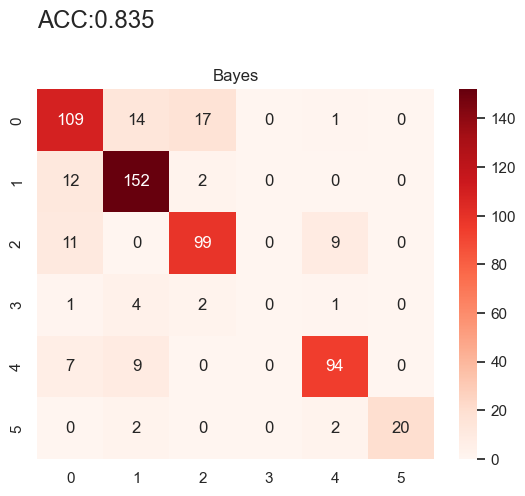

In [52]:
bayes.fit(X_train, y_train)
cm = confusion_matrix(y_test, bayes.predict(X_test))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt="d")
plt.title('Bayes')
plt.annotate("ACC:%.3f"%(calculate_acc(cm)), (0, -1), fontsize="x-large", annotation_clip=False)
plt.show()

多层感知器
======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

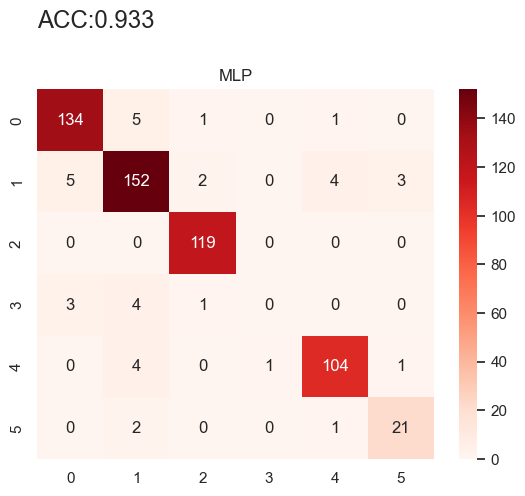

In [61]:
MLP = MLPClassifier(hidden_layer_sizes=[20,100],max_iter=1000,random_state=62)
MLP.fit(X_train, y_train)
cm = confusion_matrix(y_test, MLP.predict(X_test))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt="d")
plt.annotate("ACC:%.3f"%(calculate_acc(cm)), (0, -1), fontsize="x-large", annotation_clip=False)
plt.title('MLP')
plt.show()

PAC主成成分分析+SVM
=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

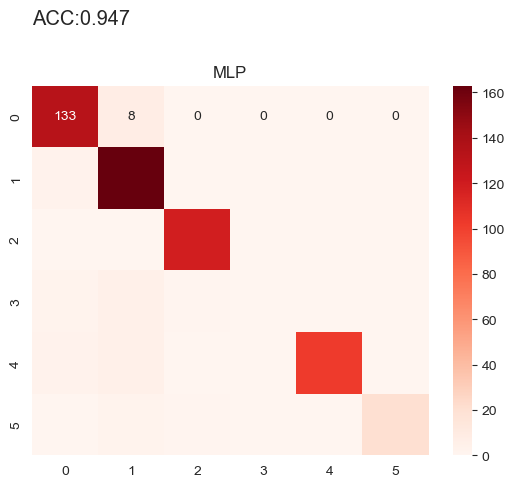

In [35]:
pca = PCA(n_components=0.9)
svm = SVC(kernel='rbf')
pipe = make_pipeline(pca, svm)
pipe.fit(X_train, y_train)
cm = confusion_matrix(y_test, pipe.predict(X_test))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt="d")
plt.annotate("ACC:%.3f"%(calculate_acc(cm)), (0, -1), fontsize="x-large", annotation_clip=False)
plt.title('MLP')
plt.show()